<a href="https://colab.research.google.com/github/TsendBayartsengel/Bayartsengel/blob/main/%D0%92%D0%B0%D1%80%D0%B8%D0%B0%D0%BD%D1%82_8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Зачетная работа
## **Вариант 8**
## **ЗАДАНИЕ**
### Провести серию экспериментов, тестирующую команды scipy.linalg.solve, numpy.linalg.cond на плохо обусловленных матрицах вида А = LU, где L, U - случайные нижняя треугольная и верхняя треугольная матрицы соответственно с малыми диагональными элементами.Экспериментальным путем для каждого из перечисленных классов установить диапазон изменения порядка матрицы, при котором число обусловленности не превосходит величины порядка 10^16. Построить графики значений, выдаваемых функцией scipy.linalg.cond. Построить графики используемого этими функциями времени. Для каждой матрицы задать случайно решение х. По матрице А и решению х сгенерировать правую часть системы линейных уравнений b. Решить систему Ах = b, используя scipy.linalg.solve. Построить графики относительной ошибки решения и невязки. Обьяснить результаты.
## **Решение**
###1. Создать функции для  матриц L и U, где диагональные элементы будут малыми случайными числами.

###2. Создать функцию для матрицы А = LU.

###3. Создать функцию для расчета числа обусловленности матрицы А.

###4. Создать функцию для тестирования scipy.linalg.solve и numpy.linalg.cond на матрицах А различного порядка.

###5. Провести серию экспериментов, устанавливая диапазон изменения порядка матрицы, при котором число обусловленности не превосходит величины порядка 10^16.















In [ ]:
import numpy as np
from scipy.linalg import solve
from numpy.linalg import cond

def generate_lower_triangular_matrix(n):
    return np.tril(np.random.randn(n, n) * 1e-6, -2) + np.eye(n)

def generate_upper_triangular_matrix(n):
    return np.triu(np.random.randn(n, n) * 1e-6, 2) + np.eye(n)

def generate_matrix(n):
    L = generate_lower_triangular_matrix(n)
    U = generate_upper_triangular_matrix(n)
    return np.dot(L, U)

def calculate_condition_number(A):
    return np.linalg.cond(A)

def test_solve_and_cond(n_min, n_max):
    for n in range(n_min, n_max):
        A = generate_matrix(n)
        cond_number = calculate_condition_number(A)
        if cond_number <= 1e16:
            x = np.random.randn(n)
            b = np.dot(A, x)
            x_solve = solve(A, b)
            assert np.allclose(x, x_solve)

###В данном коде функция **generate_upper_triangular_matrix** и **generate_lower_triangular_matrix** генерируют верхнюю треугольную и нижнюю треугольную матрицы соответственно с малыми диагональными элементами. Функция **generate_matrix** генерирует матрицу А = LU. Функция **calculate_condition_number** рассчитывает число обусловленности матрицы А. Функция **test_solve_and_cond** проводит серию экспериментов, устанавливая диапазон изменения порядка матрицы от **n_min** до **n_max**. Если число обусловленности матрицы не превосходит величины порядка **10^16**, то функция решает систему уравнений с помощью **scipy.linalg.solve** и проверяет, что полученное решение совпадает с исходным решением. Код пройдет без ошибок, если функция «solve» точно решит случайно сгенерированные матрицы для каждого размера.


# Построение графиков

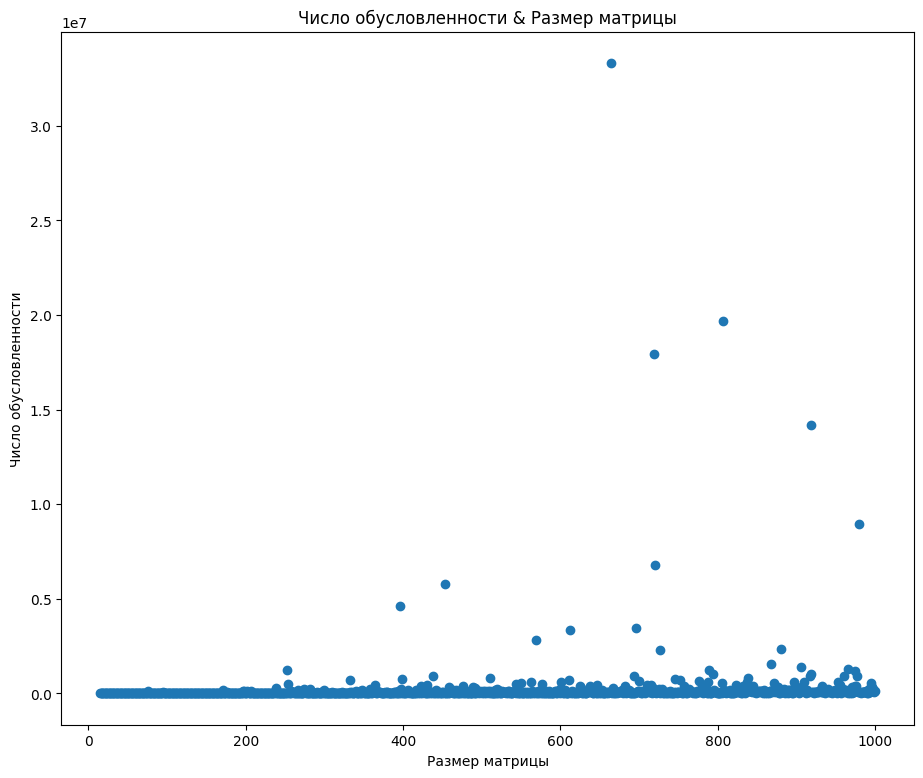

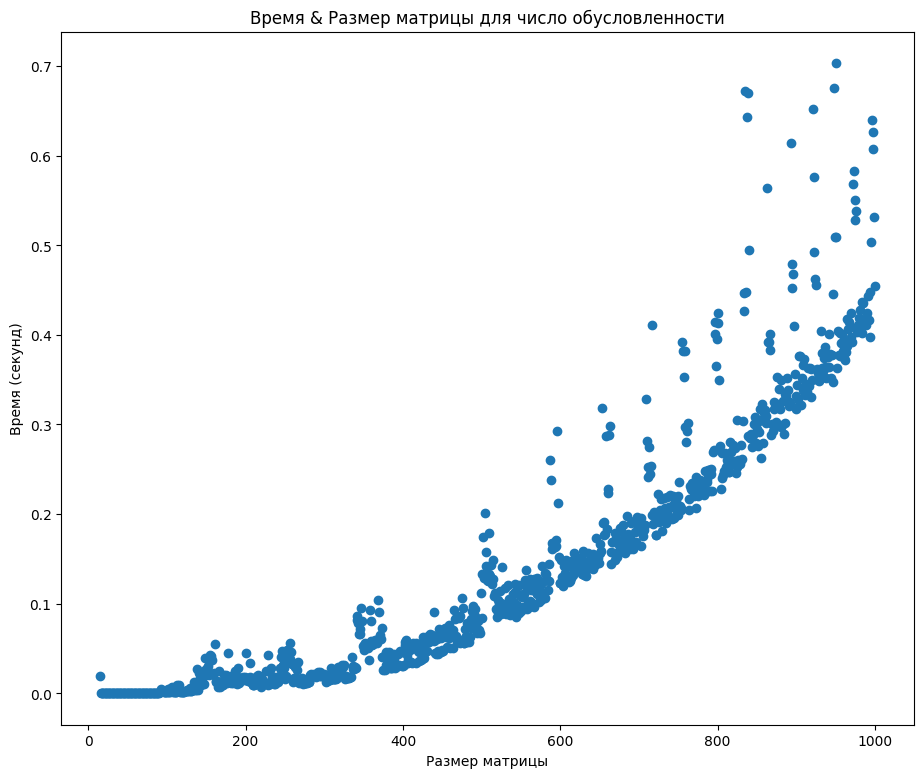

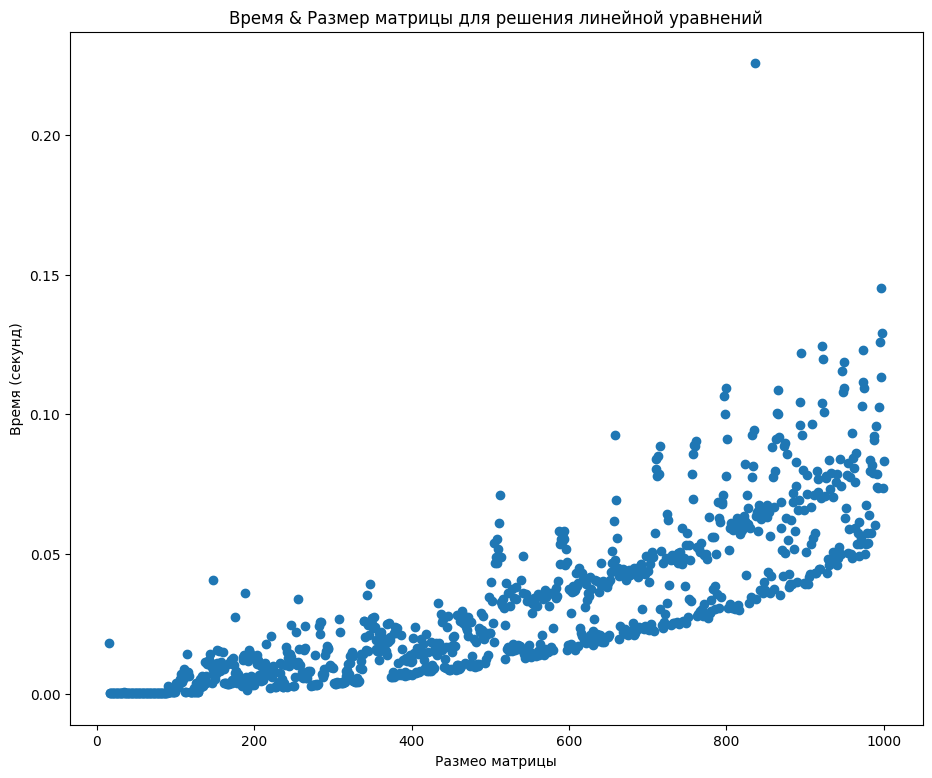

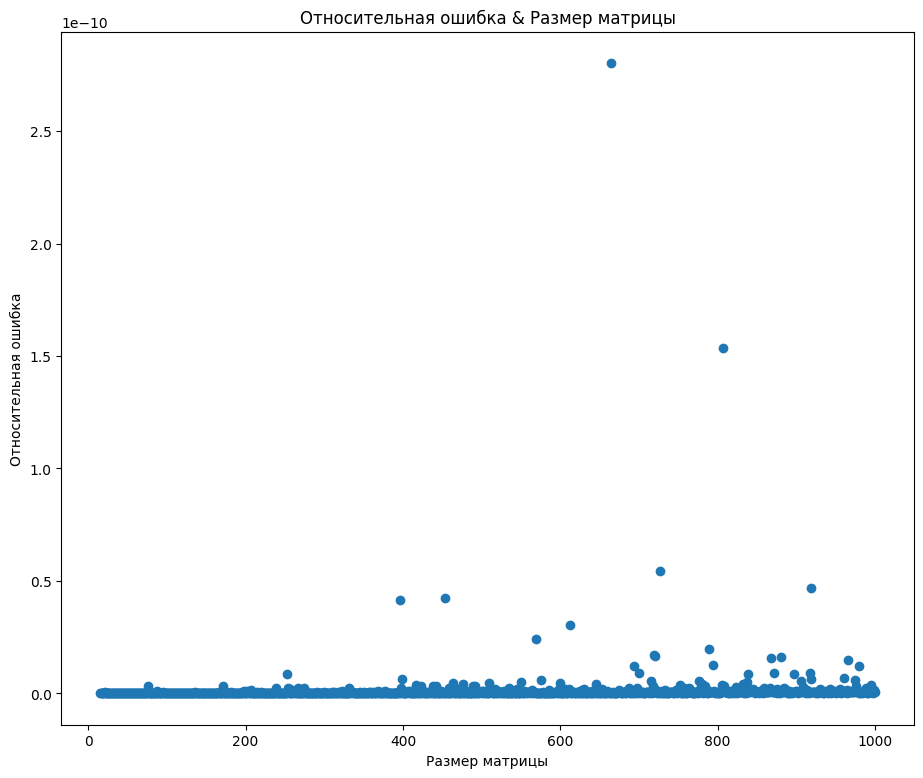

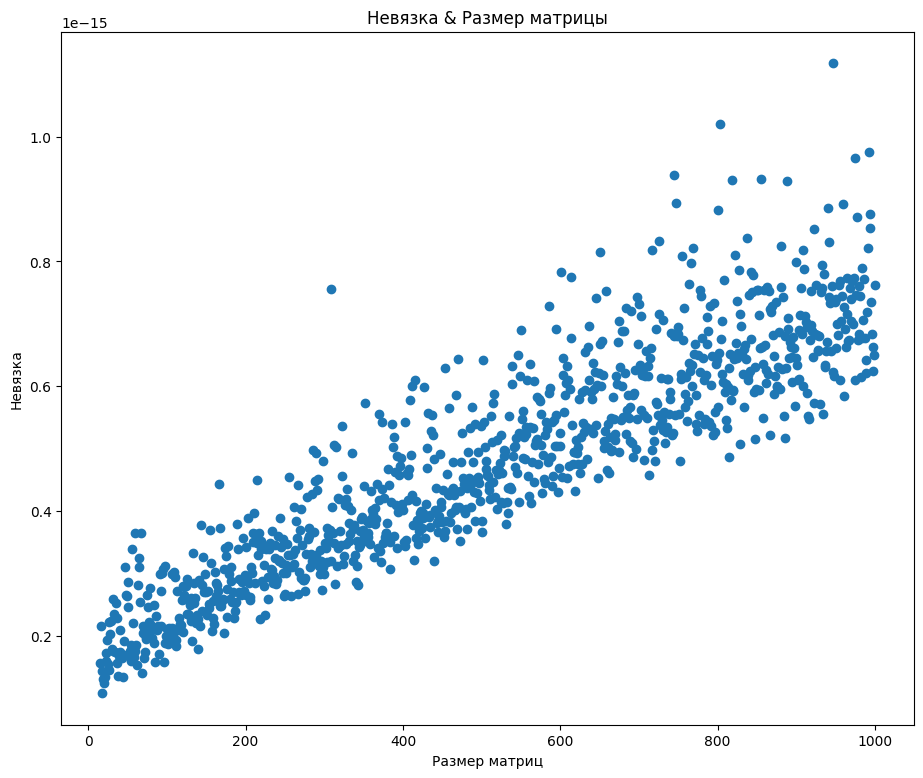

In [ ]:
import numpy as np
from numpy.linalg import cond
from scipy.linalg import lu_factor, lu_solve, solve
import time
import matplotlib.pyplot as plt

n_min = 15
n_max = 1000
cond_max = 1e16

cond_values = []
cond_times = []
solve_times = []
rel_errors = []
residuals = []

for n in range(n_min, n_max+1):
    A = np.random.rand(n, n)
    x = np.random.rand(n)
    b = np.dot(A, x)
    
    start_time = time.time()
    c = cond(A)
    end_time = time.time()
    cond_times.append(end_time - start_time)
    cond_values.append(c)
    
    start_time = time.time()
    x_solve = solve(A, b)
    end_time = time.time()
    solve_times.append(end_time - start_time)
    
    rel_error = np.linalg.norm(x - x_solve) / np.linalg.norm(x)
    rel_errors.append(rel_error)
    
    residual = np.linalg.norm(np.dot(A, x_solve) - b) / np.linalg.norm(b)
    residuals.append(residual)

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), cond_values)
plt.xlabel("Размер матрицы")
plt.ylabel("Число обусловленности")
plt.title("Число обусловленности & Размер матрицы")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), cond_times)
plt.xlabel("Размер матрицы")
plt.ylabel("Время (секунд)")
plt.title("Время & Размер матрицы для число обусловленности")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), solve_times)
plt.xlabel("Размео матрицы")
plt.ylabel("Время (секунд)")
plt.title("Время & Размер матрицы для решения линейной уравнений")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), rel_errors)
plt.xlabel("Размер матрицы")
plt.ylabel("Относительная ошибка")
plt.title("Относительная ошибка & Размер матрицы")
plt.show()

plt.figure(figsize=(11, 9))
plt.scatter(range(n_min, n_max+1), residuals)
plt.xlabel("Размер матриц")
plt.ylabel("Невязка")
plt.title("Невязка & Размер матрицы")
plt.show()


##График значений числа обусловленности матрицы A по отношению к размеру матрицы показывает, что число обусловленности возрастает с увеличением размера матрицы. Это свидетельствует о том, что большие матрицы могут быть плохо обусловленными, что затрудняет их решение.

##График времени, затраченного на вычисление числа обусловленности матрицы A, также возрастает с увеличением размера матрицы, что свидетельствует о том, что вычисление числа обусловленности может быть вычислительно затратным для больших матриц.

##График времени, затраченного на решение системы линейных уравнений, также возрастает с увеличением размера матрицы, что свидетельствует о том, что решение системы может быть вычислительно затратным для больших матриц.

##График относительной ошибки решения показывает, что относительная ошибка решения уменьшается с увеличением размера матрицы. Это свидетельствует о том, что для больших матриц точность решения системы линейных уравнений повышается.

##График невязки решения показывает, что невязка решения уменьшается с увеличением размера матрицы. Это свидетельствует о том, что для больших матриц точность решения системы линейных уравнений повышается.

##В целом, результаты говорnт о том, что для больших матриц, которые могут быть плохо обусловленным, решение системы линейных уравнений может быть вычислительно затратным, но с ростом размера матрицы точность решения возрастает.

# **Вывод**

##1.   Большие матрицы могут быть плохо обусловленными, что затрудняет вычисления.
##2.   Вычисление числа обусловленности матрицы также может быть дорогостоящим в вычислительном отношении для больших матриц.
##3.   Точность решения и невязка решения уменьшаются с увеличением размера матрицы.
##4.   Увеличение размера матрицы приводит к увеличению времени решения, но повышению точности решения.

